<a href="https://colab.research.google.com/github/watch-raider/snapshot-karoo/blob/main/SnapshotKaroo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset - Snapshot Karoo
The Karoo National Park is a wildlife reserve in the Great Karoo area of the Western Cape, South Africa near Beaufort West. This semi-desert area covers an area of 750 square kilometres.

The Karoo National Park is a sanctuary for herds of springbok, gemsbok (or Oryx),black wildebeest Cape mountain zebra, red hartebeest, black rhinoceros, eland, kudu, klipspringer, bat-eared foxes, black-backed jackal, ostriches, and, since fairly recently, lions.

This data set contains 14889 sequences of camera trap images, totaling 38074 images, from the Snapshot Karoo project, part of the Snapshot Safari network.

Labels are provided for 38 categories, primarily at the species level (for example, the most common labels are gemsbokoryx, hartebeestred, and kudu). Approximately 83.02% of images are labeled as empty.

https://lila.science/datasets/snapshot-karoo

In [54]:
# import any necessary libraries
import os
import json
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import random

# Task 1: Data Selection, Loading
Task is to load the dataset using Python, including the images and the annotations, so that it can be passed into the model.

Certain folders corresponding to different Camera Traps were downloaded which includes the following:

1.   A01
2.   A02
3.   D01
4.   D03
5.   E01
6.   E03

The intial dataset downloaded was 2.9GB, containing 2,799 images. This should be reduced further to around 1000 images. Click the link below to access the images.

[Selected Data](https://drive.google.com/drive/folders/1xZzsGW-mqH0Alcv5Y6DyoAvWQT-9YLuk?usp=sharing)

Data ID - 1xZzsGW-mqH0Alcv5Y6DyoAvWQT-9YLuk

https://github.com/watch-raider/snapshot-karoo.git




In [3]:
# loading data from Github

!git clone https://github.com/watch-raider/snapshot-karoo.git
%ls

Cloning into 'snapshot-karoo'...
remote: Enumerating objects: 1115, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 1115 (delta 0), reused 3 (delta 0), pack-reused 1112
Receiving objects: 100% (1115/1115), 1.08 GiB | 40.19 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (1098/1098), done.
sample_data/  snapshot-karoo/


In [4]:
image_root_path = '/content/snapshot-karoo/KAR_S1'
annotations_path = '/content/snapshot-karoo/SnapshotKaroo_S1_v1.0.json'
camera_traps = ['A01', 'A02', 'D01', 'D03', 'E01', 'E03']

# Opening JSON file containing annotations
annotations_json = open(annotations_path)

# returns JSON object as
# a dictionary
annotations_data = json.load(annotations_json)
annotations_data['info']

{'version': '1.0',
 'description': 'Camera trap data from the Snapshot Karoo program',
 'date_created': '2019',
 'contributor': 'Snapshot Safari'}

In [35]:
# display categories in data
annotations_data['categories']

[{'id': 0, 'name': 'empty'},
 {'id': 1, 'name': 'human'},
 {'id': 2, 'name': 'zebramountain'},
 {'id': 3, 'name': 'baboon'},
 {'id': 4, 'name': 'kudu'},
 {'id': 5, 'name': 'gemsbokoryx'},
 {'id': 6, 'name': 'springbok'},
 {'id': 7, 'name': 'eland'},
 {'id': 8, 'name': 'rhinocerosblack'},
 {'id': 9, 'name': 'ostrich'},
 {'id': 10, 'name': 'rhebokgrey'},
 {'id': 11, 'name': 'hartebeestred'},
 {'id': 12, 'name': 'reedbuckmountain'},
 {'id': 13, 'name': 'steenbok'},
 {'id': 14, 'name': 'zebraburchells'},
 {'id': 15, 'name': 'bustardkori'},
 {'id': 16, 'name': 'birdother'},
 {'id': 17, 'name': 'jackalblackbacked'},
 {'id': 18, 'name': 'duiker'},
 {'id': 19, 'name': 'monkeyvervet'},
 {'id': 20, 'name': 'hare'},
 {'id': 21, 'name': 'wildebeestblue'},
 {'id': 22, 'name': 'caracal'},
 {'id': 23, 'name': 'lionmale'},
 {'id': 24, 'name': 'tortoise'},
 {'id': 25, 'name': 'foxcape'},
 {'id': 26, 'name': 'rabbitriverine'},
 {'id': 27, 'name': 'porcupine'},
 {'id': 28, 'name': 'bustardludwigs'},
 {'i

In [6]:
all_img_paths = []

# get all image paths for each camera in selected dataset
for camera in camera_traps:
    folder_dir = '{}/{}/{}_R1'.format(image_root_path, camera, camera)
    img_paths = os.listdir(folder_dir)
    all_img_paths += img_paths
    print(camera, len(img_paths))

print('Total', len(all_img_paths))

A01 123
A02 188
D01 180
D03 147
E01 248
E03 209
Total 1095


In [7]:
# retreive annotations for selected images
img_annotations = [x for x in annotations_data['annotations'] if '{}.JPG'.format(x['image_id'].split('/')[-1]) in all_img_paths]
print(len(img_annotations), len(all_img_paths))

# retreive data that will be used from annotations and load into Dataframe
selected_data = [[x['subject_id'], x['image_id'], x['location'], x['category_id'], x['count']] for x in img_annotations]
df = pd.DataFrame(selected_data, columns=['subject_id', 'image_id', 'camera', 'category_id', 'count'])
print(len(df))
df.head()

1097 1095
1097


,subject_id,image_id,camera,category_id,count
0,28794487,KAR_S1/A01/A01_R1/KAR_S1_A01_R1_IMAG00015,A01,2,1
1,28794488,KAR_S1/A01/A01_R1/KAR_S1_A01_R1_IMAG00016,A01,3,1
2,28794489,KAR_S1/A01/A01_R1/KAR_S1_A01_R1_IMAG00017,A01,3,1
3,28794490,KAR_S1/A01/A01_R1/KAR_S1_A01_R1_IMAG00018,A01,4,1
4,28794492,KAR_S1/A01/A01_R1/KAR_S1_A01_R1_IMAG00020,A01,5,1


Categories in dataset [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18, 19, 23, 27, 35, 37]


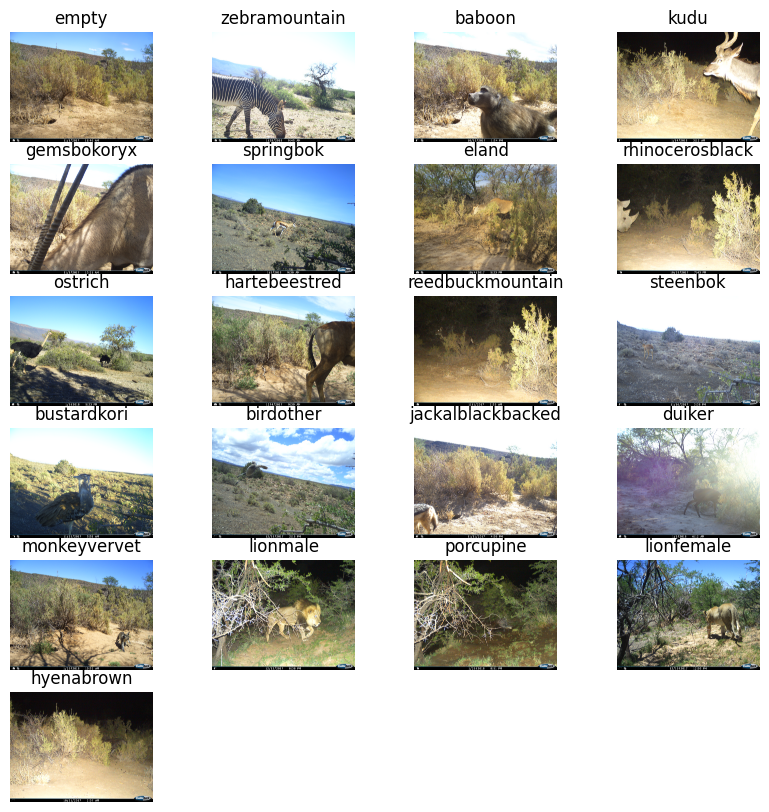

In [57]:
# Display some images
categories = set(df['category_id'].values)
categories = list(categories)
print('Categories in dataset', categories)

figure = plt.figure(figsize=(10, 10))
cols, rows = 4, (len(categories) // 4) + 1

category_i = 0
for i in range(1, cols * rows + 1):
    if category_i < len(categories):
        images = df[df['category_id'] == categories[category_i]]
        # Display different images each time
        random_img_id = random.randint(0, len(images) - 1)
        image = img.imread('/content/snapshot-karoo/{}.JPG'.format(images.iloc[random_img_id]['image_id']))
        figure.add_subplot(rows, cols, i)
        plt.title(annotations_data['categories'][categories[category_i]]['name'])
        plt.axis("off")
        plt.imshow(image)
        category_i += 1
    else:
        break

plt.show()

# Task 2: Visualisation
Some visualisation will then need to be performed in order to understand the dataset that has been selected.

Some ideas of what we need:


*   Species make up (number of images for each species)
*   Number images with no animals
*   Number of images for each Camera Trap
*   The species make up for each Camera Trap (e.g. how many Zebras did A01 Camera Trap capture)









In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load JSON data
with open('/content/snapshot-karoo/SnapshotKaroo_S1_v1.0.json') as f:
    data = json.load(f)

# Convert categories to DataFrame
categories_df = pd.DataFrame(data['categories'])

# Convert annotations to DataFrame
annotations_df = pd.DataFrame(data['annotations'])

# Remove annotations with empty names
annotations_df = annotations_df.dropna(subset=['name'])

# Convert images to DataFrame
images_df = pd.DataFrame(data['images'])

# Remove images with empty names
images_df = images_df.dropna(subset=['name'])

# Species make up (number of images for each species)
species_counts = annotations_df['category_id'].map(categories_df.set_index('id')['name']).value_counts()

# Plot
plt.figure(figsize=(10, 6))
species_counts.plot(kind='bar')
plt.title('Number of Images for Each Species')
plt.xlabel('Species')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

# Number of images with no animals
no_animal_count = annotations_df['category_id'].isnull().sum()
print("Number of images with no animals:", no_animal_count)

# Number of images for each Camera Trap
camera_counts = images_df['location'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
camera_counts.plot(kind='bar')
plt.title('Number of Images for Each Camera Trap')
plt.xlabel('Camera Trap')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

# The species make up for each Camera Trap
species_per_trap = annotations_df.groupby(['location', 'category_id']).size().unstack(fill_value=0)
species_per_trap = species_per_trap.rename(columns=categories_df.set_index('id')['name'])

# Plot
plt.figure(figsize=(12, 8))
species_per_trap.plot(kind='bar', stacked=True)
plt.title('Species Make Up for Each Camera Trap')
plt.xlabel('Camera Trap')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.legend(title='Species')
plt.show()

# Pie chart for images with empty names vs. other images
empty_name_count = images_df['name'].isnull().sum()
other_images_count = len(images_df) - empty_name_count
labels = ['Images with Empty Names', 'Other Images']
sizes = [empty_name_count, other_images_count]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Images by Name')
plt.show()


KeyError: ['name']

# Task 3: Data Cleaning
After understanding the dataset better, some data cleaning will be required in order to balance it better.

Potential tasks:


*   Feature selection to optimise feature space
*   Split the dataset into train and test
*   Improve class distribution balance e.g. reduce number of images classified as empty
*   Remove images labeled as human
*   Make sure that each species of animal has some images in the train dataset (recommend using Stratified Cross-Validation)




# Task 4: Build, Train, and Test Classifier Model
Next step is to build or select a prebuilt Classifier model to perform the Classification task


*   MLPClassifier from scikit-learn which implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation
*   Data augmentation
*   Convert data so that it can be loaded into model



# Task 5: Analyse and Visualise Results
Final step is to assess the accuracy of the model and visualise its performance.


*   Might be good to look at Cross-Validation score

